## Code for Predicting Smoking Status with Bodily Data

#### Produced by: Yuqi Yang (yuqiyang0614@gmail.com)

### Data Import and Initial Understanding

In [236]:
import pandas as pd
import seaborn as sb
import numpy as np

# Read raw dataset from csv file
path_to_data = '../data/raw_data.csv'
rawDF = pd.read_csv(path_to_data)

In [172]:
# Describe types of categorical data 
catList = ['TicketGroup', 'TicketChannel', 'ZendeskPlan', 'AssigneeTier', 
           'WorkerLocation', 'CustomerSatisfaction', 'Worker_Type']
catType = pd.DataFrame()


In [173]:
for i in catList:
    tmpK = rawDF[i].value_counts().keys().tolist()
    tmpV = rawDF[i].value_counts().tolist()
    if len(tmpK) < 29:
        tmpK += [''] * (29-len(tmpK))
    if len(tmpV) < 29:
        tmpV += [''] * (29-len(tmpV))
    catType[i] = tmpK
    catType[i+'_count'] = tmpV
catType.to_csv('catType.csv', index = False)


In [237]:
# Statistics for the numeric attributes in the raw dataset
rawDF.describe()

,EmployeeID,TicketID,FirstReplyTime,FullResolutionTime,NumAgentComments,NumPublicComments,TicketEscalated,CustomerSatisfaction,WorkerTenure
count,240665.000000,2.406650e+05,157169.000000,239741.000000,195237.000000,192623.000000,240665.000000,45554.000000,240665.000000
mean,1853.958444,2.612557e+06,813.261088,5949.678053,3.100309,3.834443,0.159300,0.939500,514.366223
std,651.379958,2.820156e+05,6446.203622,19227.491206,3.499996,4.566357,0.365957,0.238413,353.778344
min,1.000000,2.116910e+06,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,-223.000000
25%,1488.000000,2.340143e+06,14.000000,13.000000,1.000000,2.000000,0.000000,1.000000,262.000000
50%,1975.000000,2.629618e+06,53.000000,116.000000,2.000000,2.000000,0.000000,1.000000,469.000000
75%,2362.000000,2.849437e+06,236.000000,8112.000000,4.000000,4.000000,0.000000,1.000000,675.000000
max,3411.000000,3.224171e+06,498116.000000,548814.000000,370.000000,245.000000,1.000000,1.000000,2334.000000


In [238]:
# First 10 records of raw dataset
rawDF.head(n=10)

,EmployeeID,TicketChannel,TicketGroup,TicketID,TicketCreatedDate,ZendeskPlan,DayTicketSolved,AssigneeTier,FirstReplyTime,FullResolutionTime,NumAgentComments,NumPublicComments,TicketEscalated,CustomerSatisfaction,WorkerDateHired,WorkerLocation,Worker_Type,WorkerTenure
0,1,api,Support (T1),2840334,2017-08-04,Trial,Sunday,Tier 1,13.0,33861.0,18.0,36.0,0,NaN,2011-10-18,London,Employee,2117
1,1,email,Support (T1),2136496,2017-01-09,NaN,Wednesday,Tier 1,58.0,73659.0,30.0,70.0,1,1.0,2011-10-18,London,Employee,1910
2,1,facebook,Support (Triage),3034987,2017-10-12,Professional,Friday,Triage,30.0,1741.0,6.0,15.0,0,NaN,2011-10-18,London,Employee,2186
3,1,email,Support (T1),2311824,2017-03-02,NaN,Sunday,Tier 1,78.0,25654.0,5.0,15.0,0,NaN,2011-10-18,London,Employee,1962
4,1,email,Support (T1),2213615,2017-01-30,Professional,Friday,Tier 1,4.0,16266.0,8.0,17.0,0,0.0,2011-10-18,London,Employee,1931
5,1,email,Support (T1),2491269,2017-04-03,Enterprise Legacy,Thursday,Tier 1,131.0,3381.0,11.0,19.0,1,NaN,2011-10-18,London,Employee,1994
6,1,email,Support (T1),2136846,2017-01-09,Plus,Thursday,Tier 1,6.0,4265.0,11.0,15.0,1,NaN,2011-10-18,London,Employee,1910
7,11,web,Support (T2),2964287,2017-09-18,Team,NaN,Tier 2,1072.0,NaN,16.0,20.0,0,NaN,2011-11-07,San Francisco - 989,Employee,2142
8,25,facebook,Support (Triage),2754180,2017-07-06,Expired,Thursday,Triage,6.0,513.0,5.0,16.0,0,NaN,2011-12-13,Melbourne,Employee,2032
9,25,api,Support (T1),2477086,2017-03-29,Expired,Sunday,Tier 1,648.0,6022.0,11.0,14.0,0,1.0,2011-12-13,Melbourne,Employee,1933


In [241]:
# Merge tiecket groups DF 
mergeDF = rawDF.copy()

In [215]:
mergeDF["CleanTicketGroup"] = ""
for i in range(len(mergeDF["TicketGroup"])):
    if mergeDF.loc[i, 'TicketGroup'].startswith('Support (T1'):
        mergeDF.loc[i, 'CleanTicketGroup'] = "Support (T1)"
    elif mergeDF.loc[i, 'TicketGroup'].startswith('Support (T2'):
        mergeDF.loc[i, 'CleanTicketGroup'] = "Support (T2)"
    elif mergeDF.loc[i, 'TicketGroup'].startswith('Support (T3'):
        mergeDF.loc[i, 'CleanTicketGroup'] = "Support (T3)"
    elif mergeDF.loc[i, 'TicketGroup'].startswith('Support (Triage'):
        mergeDF.loc[i, 'CleanTicketGroup'] = "Support (Triage)"
    else:
        mergeDF.loc[i, 'CleanTicketGroup'] = "Support (Others)"

In [ ]:
for i in range(len(mergeDF["TicketGroup"])):
    if mergeDF.loc[i, 'TicketGroup'].startswith('Support (T1'):
        mergeDF.loc[i, 'CleanTicketGroup'] = "Support (T1)"
    elif mergeDF.loc[i, 'TicketGroup'].startswith('Support (T2'):
        mergeDF.loc[i, 'CleanTicketGroup'] = "Support (T2)"
    elif mergeDF.loc[i, 'TicketGroup'].startswith('Support (T3'):
        mergeDF.loc[i, 'CleanTicketGroup'] = "Support (T3)"
    elif mergeDF.loc[i, 'TicketGroup'].startswith('Support (Triage'):
        mergeDF.loc[i, 'CleanTicketGroup'] = "Support (Triage)"
    else:
        mergeDF.loc[i, 'CleanTicketGroup'] = "Support (Others)"

In [240]:
mergeDF.head(n=10)
mergeDF.to_csv('cleaned_tkGrp.csv',index=False)

NameError: name 'mergeDF' is not defined

In [242]:
# Data scheme of the raw dataset (data type for each column)
rawDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240665 entries, 0 to 240664
Data columns (total 18 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   EmployeeID            240665 non-null  int64  
 1   TicketChannel         240665 non-null  object 
 2   TicketGroup           240665 non-null  object 
 3   TicketID              240665 non-null  int64  
 4   TicketCreatedDate     240665 non-null  object 
 5   ZendeskPlan           177729 non-null  object 
 6   DayTicketSolved       239741 non-null  object 
 7   AssigneeTier          208010 non-null  object 
 8   FirstReplyTime        157169 non-null  float64
 9   FullResolutionTime    239741 non-null  float64
 10  NumAgentComments      195237 non-null  float64
 11  NumPublicComments     192623 non-null  float64
 12  TicketEscalated       240665 non-null  int64  
 13  CustomerSatisfaction  45554 non-null   float64
 14  WorkerDateHired       240665 non-null  object 
 15  

In [243]:
# Number of nulls/empty balues for each column
rawDF.isnull().sum()

EmployeeID                   0
TicketChannel                0
TicketGroup                  0
TicketID                     0
TicketCreatedDate            0
ZendeskPlan              62936
DayTicketSolved            924
AssigneeTier             32655
FirstReplyTime           83496
FullResolutionTime         924
NumAgentComments         45428
NumPublicComments        48042
TicketEscalated              0
CustomerSatisfaction    195111
WorkerDateHired              0
WorkerLocation               0
Worker_Type                  0
WorkerTenure                 0
dtype: int64

### Univariate Analysis

In [251]:
# Feature engineer
featureDF = rawDF.copy()
featureDF = featureDF.drop(['EmployeeID', 'TicketID', 'TicketCreatedDate', 'WorkerDateHired'], axis=1)

In [253]:
# Calculate skewness for continuos's each column
featureDF.skew(numeric_only=True)

FirstReplyTime          37.113944
FullResolutionTime      11.534085
NumAgentComments        11.325385
NumPublicComments        6.462823
TicketEscalated          1.861983
CustomerSatisfaction    -3.687047
WorkerTenure             1.566655
dtype: float64

In [254]:
# Calculate kurtosis for continuos's each column
featureDF.kurtosis(numeric_only=True)

FirstReplyTime          1766.264571
FullResolutionTime       190.195197
NumAgentComments         697.440452
NumPublicComments        128.569637
TicketEscalated            1.466994
CustomerSatisfaction      11.594827
WorkerTenure               4.040307
dtype: float64

In [255]:
# Map of features in the dataset if they are categorical or numerical
map_of_features = {
    'TicketChannel': 'C',
    'TicketGroup': 'C',
    'ZendeskPlan': 'C',
    'DayTicketSolved': 'C',
    'AssigneeTier': 'C',
    'FirstReplyTime': 'N',
    'FullResolutionTime': 'N',
    'NumAgentComments': 'N',
    'NumPublicComments': 'N',
    'TicketEscalated': 'C',
    'CustomerSatisfaction': 'C',
    'WorkerLocation': 'C',
    'Worker_Type': 'C',
    'WorkerTenure': 'N'
}

In [261]:
ranges = []
column = []
mean = []
median = []
mode = []
for columns in featureDF:
    if map_of_features[columns] == "N":
        data_range = int(featureDF[columns].max())-featureDF[columns].min()
        mean.append(featureDF[columns].mean())
        median.append(featureDF[columns].median())
        mode.append(featureDF[columns].mode())
        ranges.append(data_range)
        column.append(columns)
    
rangeDF = pd.DataFrame()
rangeDF["Columns"] = column
rangeDF['Range'] = ranges
rangeDF["Mean"] = mean
rangeDF["Median"] = median
rangeDF["Mode"] = mode
rangeDF

,Columns,Range,Mean,Median,Mode
0,FirstReplyTime,498116.0,813.261088,53.0,"0 2.0 Name: FirstReplyTime, dtype: float64"
1,FullResolutionTime,548814.0,5949.678053,116.0,"0 1.0 Name: FullResolutionTime, dtype: float64"
2,NumAgentComments,369.0,3.100309,2.0,"0 1.0 Name: NumAgentComments, dtype: float64"
3,NumPublicComments,244.0,3.834443,2.0,"0 2.0 Name: NumPublicComments, dtype: float64"
4,WorkerTenure,2557.0,514.366223,469.0,"0 464 Name: WorkerTenure, dtype: int64"


d:\Python\Lib\site-packages\pandas\core\nanops.py:1010: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)
d:\Python\Lib\site-packages\pandas\core\nanops.py:1010: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)


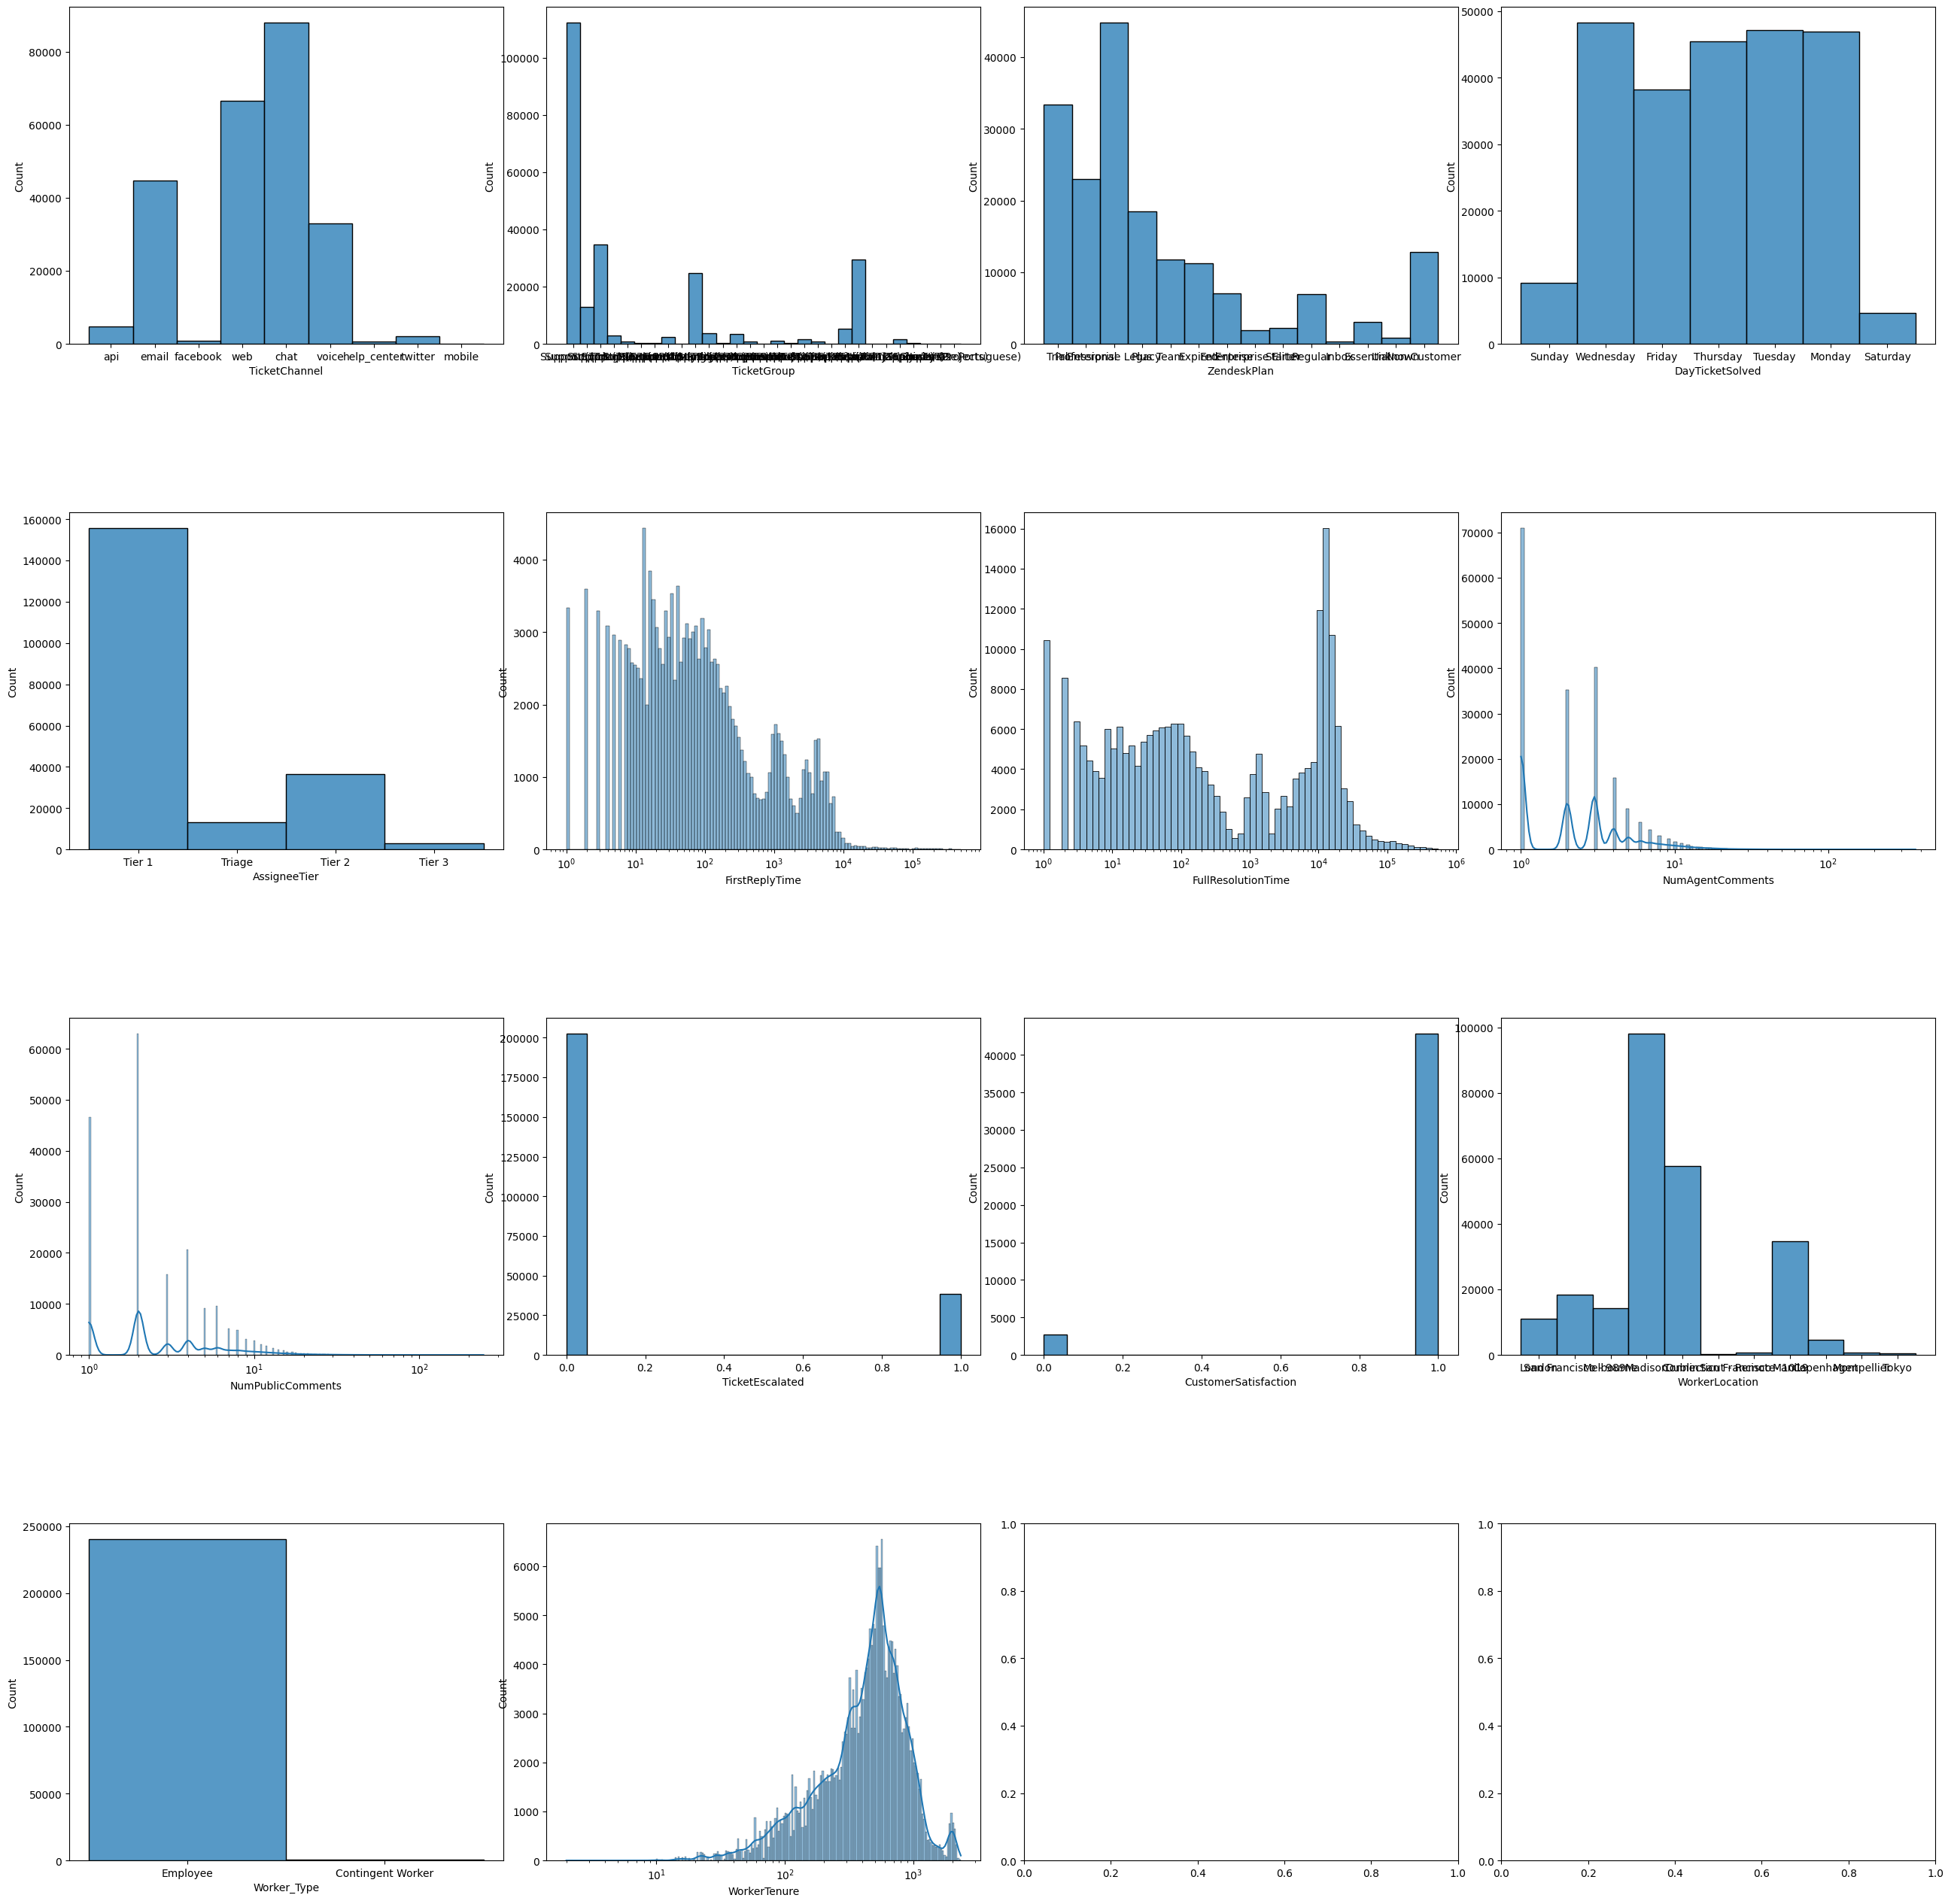

In [298]:
# Histogram and Density Plot
import seaborn as sns
import matplotlib.pyplot as plt

fig, axis = plt.subplots(nrows = 4,ncols = 4, figsize = (32, 32))
for column in featureDF:
    axis = np.ravel(axis)
    fig.subplots_adjust(hspace=0.5, wspace=0.1)
    if map_of_features[column] == "C":
        sns.histplot(ax = axis[featureDF.columns.get_loc(column)], data = featureDF[column], kde = False)
    else:
        sns.histplot(ax = axis[featureDF.columns.get_loc(column)], data = featureDF[column], kde = True, log_scale=True)


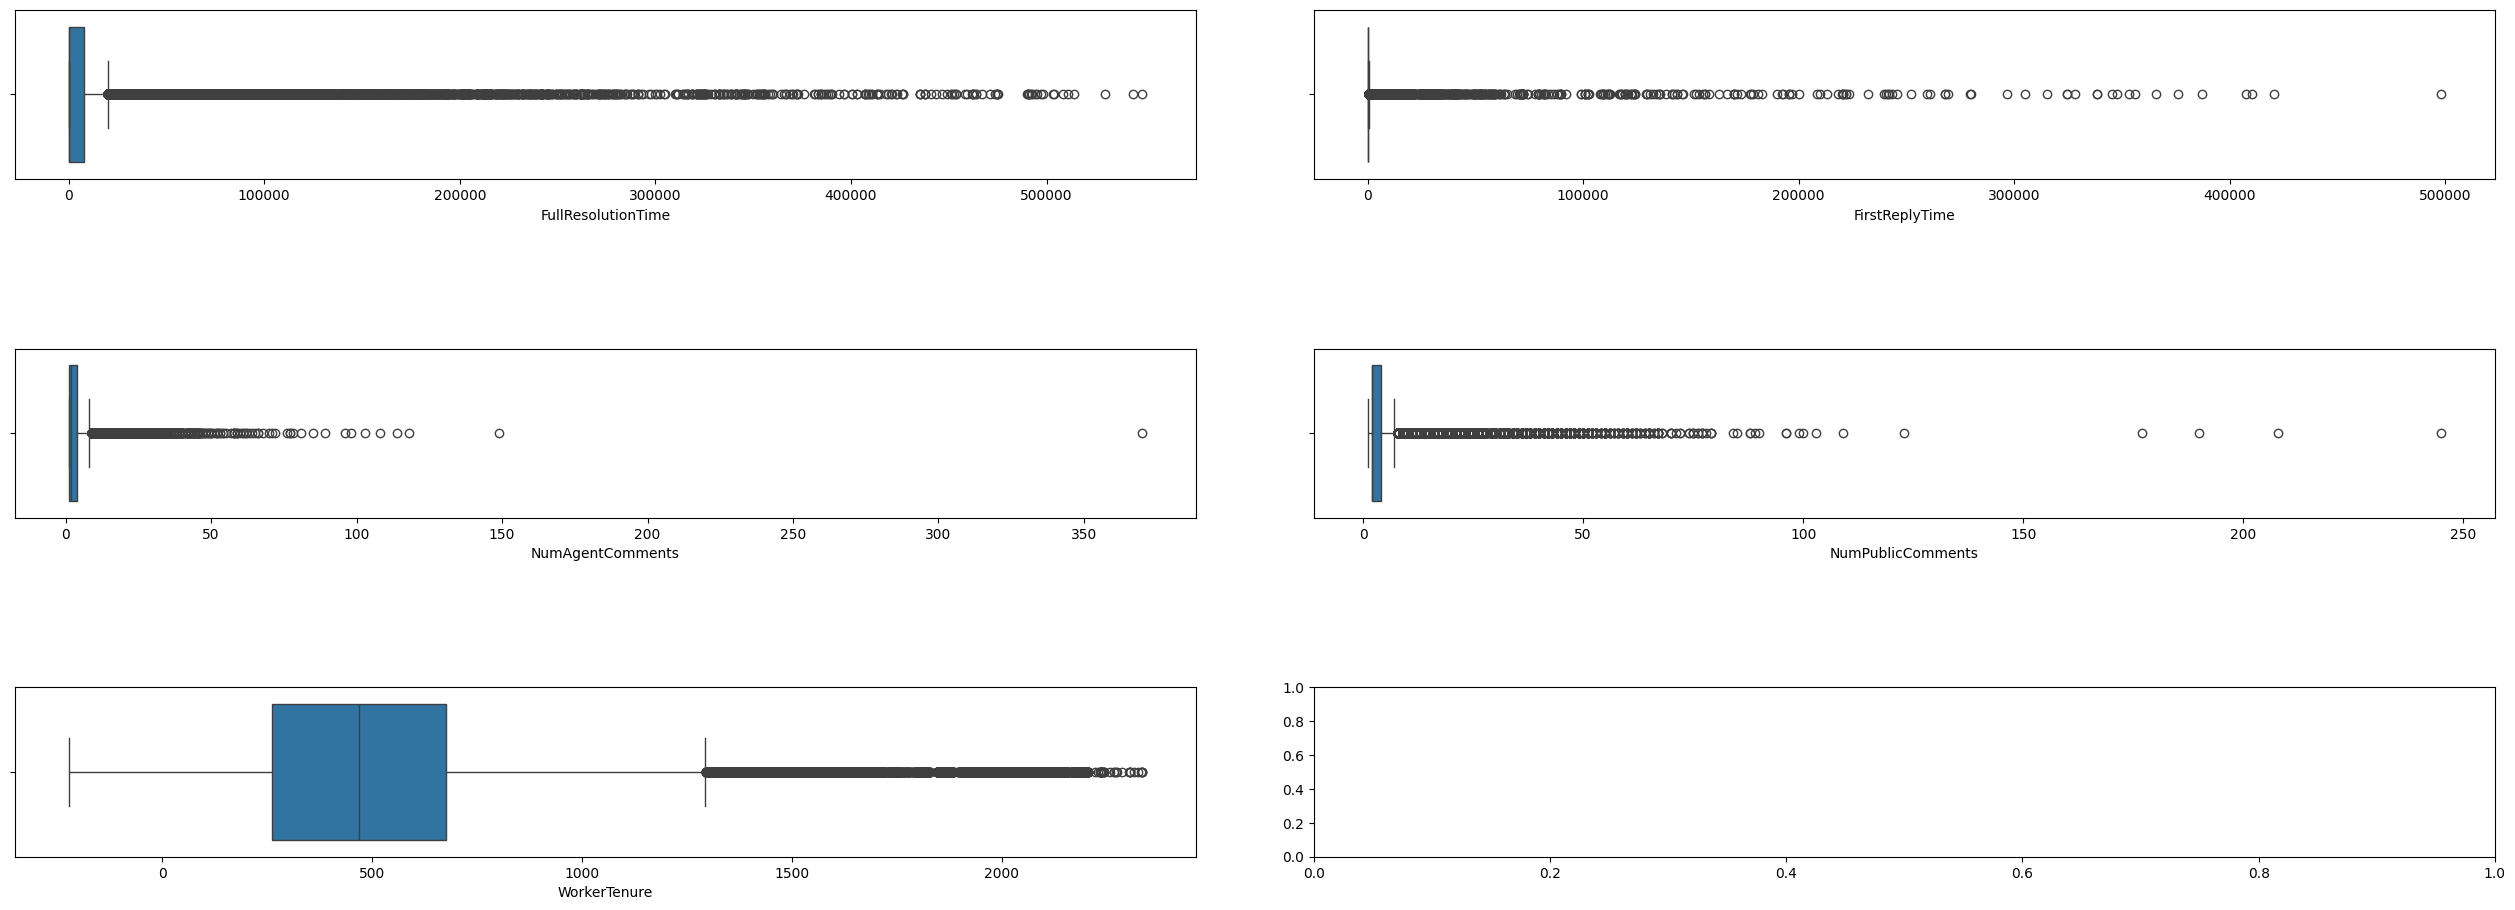

In [288]:
# box plot 
numDF = featureDF[['FullResolutionTime', 'FirstReplyTime', 'NumAgentComments', 'NumPublicComments', 'WorkerTenure']]
fig, axis = plt.subplots(nrows = 3,ncols = 2, figsize = (32, 11))
for column in numDF:
    axis = np.ravel(axis)
    sns.boxplot(ax = axis[numDF.columns.get_loc(column)], x=numDF[column])
    fig.subplots_adjust(hspace=1, wspace=0.1)
plt.show()
